In [3]:
from build import CONFIGURATION

from semra.analysis.landscape import get_mesh_category_curies, notebook

# some resources are generic, so we want to cut to a relevant subset
subsets = {
    "mesh": get_mesh_category_curies("A", skip=["A11"]),
    "ncit": ["ncit:C12219"],
    "umls": [
        # see https://uts.nlm.nih.gov/uts/umls/semantic-network/root
        "sty:T024",  # tissue
        "sty:T017",  # anatomical structure
    ],
}

## Summarize the Resources

We summarize the resources used in the landscape analysis, including their [Bioregistry](https://bioregistry.io)
prefix, license, current version, and number of terms (i.e., named concepts) they contain.


,name,license,version,terms
prefix,,,,
uberon,Uber Anatomy Ontology,CC-BY-3.0,2024-03-22,14480
mesh,Medical Subject Headings,CC0-1.0,2024,1776
bto,BRENDA Tissue Ontology,CC-BY-4.0,2021-10-26,6511
caro,Common Anatomy Reference Ontology,CC-BY-4.0,2023-03-15,84
ncit,NCI Thesaurus,CC-BY-4.0,24.02d,7555
umls,Unified Medical Language System Concept Unique...,https://www.nlm.nih.gov/research/umls/knowledg...,2023AB,7490


## Summarize the Mappings

In order to summarize the mappings, we're going to load them, index them, and count
the number of mappings between each pair of resources. The self-mapping column is
the count of terms in the resource. We'll do this to the raw mappings first, then
to the processed mappings, then compare them.


First, we summarize the raw mappings, i.e., the mappings that are directly available from the sources

target_prefix,uberon,mesh,bto,caro,ncit,umls
source_prefix,,,,,,
uberon,14480,1105,1461,52,2592,2948
mesh,1105,1776,0,0,34,1776
bto,1461,0,6511,0,0,0
caro,52,0,0,84,0,0
ncit,2592,34,0,0,7555,7514
umls,2948,1776,0,0,7514,7490


Next, we summarize the processed mappings, which include inference, reasoning, and confidence filtering.

target_prefix,uberon,mesh,bto,caro,ncit,umls
source_prefix,,,,,,
uberon,14480,1107,1461,52,2613,3172
mesh,1107,1776,61,0,83,1776
bto,1461,61,6511,6,820,889
caro,52,0,6,84,19,18
ncit,2613,83,820,19,7555,7515
umls,3172,1776,889,18,7515,7490


Below is an graph-based view on the processed mappings.

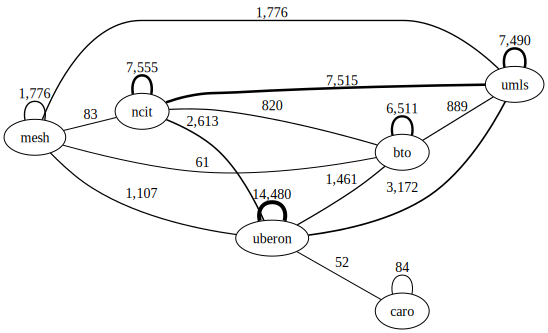

## Comparison

The following comparison shows the absolute number of mappings added by processing/inference.
Across the board, this process adds large numbers of mappings to most resources, especially
ones that were previously only connected to a small number of other resources.


target_prefix,uberon,mesh,bto,caro,ncit,umls
source_prefix,,,,,,
uberon,0,2,0,0,21,224
mesh,2,0,61,0,49,0
bto,0,61,0,6,820,889
caro,0,0,6,0,19,18
ncit,21,49,820,19,0,1
umls,224,0,889,18,1,0


Here's an alternative view on the number of mappings normalized to show percentage gain.

Note:

- `inf` means that there were no mappings before and now there are a non-zero number of mappings
- `NaN` means there were no mappings before inference and continue to be no mappings after inference


target_prefix,uberon,mesh,bto,caro,ncit,umls
source_prefix,,,,,,
uberon,0.0,0.2,0.0,0.0,0.8,7.6
mesh,0.2,0.0,inf,NaN,144.1,0.0
bto,0.0,inf,0.0,inf,inf,inf
caro,0.0,NaN,inf,0.0,inf,inf
ncit,0.8,144.1,inf,inf,0.0,0.0
umls,7.6,0.0,inf,inf,0.0,0.0


## Landscape Analysis

Before, we looked at the overlaps between each resource. Now, we use that information jointly to
estimate the number of terms in the landscape itself, and estimate how much of the landscape
each resource covers.


This estimates a total of 524,946 unique entities.

- 502,655 (95.8%) have
  at least one mapping.
- 22,291 (4.2%)
  are unique to a single resource.
- 2 (0.0%)
  appear in all 6 resources.

This estimate is susceptible to several caveats:

- Missing mappings inflates this measurement
- Generic resources like MeSH contain irrelevant entities that can't be mapped


Because there are 6, there are 64 possible overlaps to consider.
Therefore, a Venn diagram is not possible, so we
we use an [UpSet plot](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4720993) (Lex *et al.*, 2014)
as a high-dimensional Venn diagram.


/Users/cthoyt/dev/semra/src/semra/analysis/landscape.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


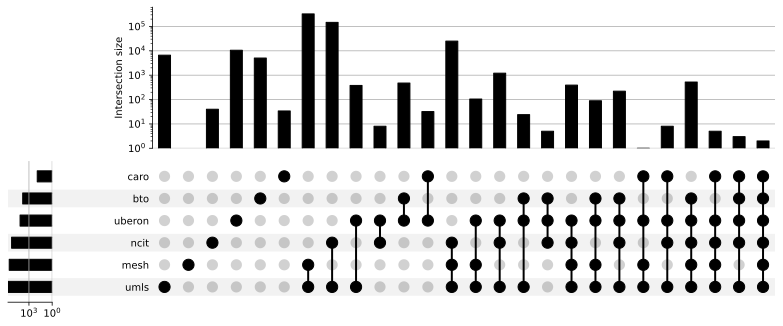

We now aggregate the mappings together to estimate the number of unique entities and number
that appear in each group of resources.


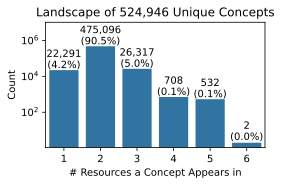

In [4]:
notebook(CONFIGURATION, subsets, output_directory=".")